In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, \
    completeness_score, silhouette_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.cluster import Birch
warnings.filterwarnings('ignore')

In [2]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# предварительная обработка данных

In [4]:
key = "price_range"


In [5]:
x, y = train.drop(key, axis=1), train[key]
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
x = pd.get_dummies(x)
imputer = SimpleImputer(strategy='mean')

x = imputer.fit_transform(x)
print(x)

[[8.420e+02 0.000e+00 2.200e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.021e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.630e+02 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 ...
 [1.911e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.512e+03 0.000e+00 9.000e-01 ... 1.000e+00 1.000e+00 1.000e+00]
 [5.100e+02 1.000e+00 2.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


In [7]:
print(y)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


# K-means

In [8]:

cl_count = np.unique(y if isinstance(y, np.ndarray) else y.values).size
print(cl_count)
kmean = KMeans(n_clusters=cl_count, random_state=7).fit(x)

4


In [9]:
def plot_graphics(x, y, y_pred=None):
    fig = plt.figure(figsize=(25, 7))
    if y_pred is not None:
        ax = fig.add_subplot(1, 3, 3)
        plot_scores(x, y, y_pred, ax)
    else:
        ax = fig.add_subplot(1, 2, 1)
        pca = PCA(n_components=2, random_state=7)
        x_pca = pca.fit_transform(x)
        ax.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
        ax.set_xlabel("First main feature")
        ax.set_ylabel("Second main feature")
        ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
    plt.show()
    plt.show()



def plot_scores(x, y, y_pred, axis):
    names = ['Adjusted Rand Index', 'Adjusted Mutual Information', 'Homogeneity Score',
        'Completeness Score', 'Accuracy', 'Mistake Rate']
    scores = [adjusted_rand_score(y, y_pred), adjusted_mutual_info_score(y, y_pred), homogeneity_score(y, y_pred),
              completeness_score(y, y_pred), accuracy_score(y, y_pred), 1 - accuracy_score(y, y_pred)]
    axis.bar(names, scores)
    for rect, value in zip(axis.patches, scores):
        axis.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.004,
                     round(value, 3), ha="center")
    axis.set_title("Quality evaluation")
    axis.tick_params("x", labelrotation=90)
    axis.set_xlabel("metric", labelpad=15)
    axis.set_ylabel("eval", labelpad=15)

def visualize_clusters(x, clusters):
    reducer = PCA(n_components=2)
    reduced_features = reducer.fit_transform(x)
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Cluster')
    plt.show()



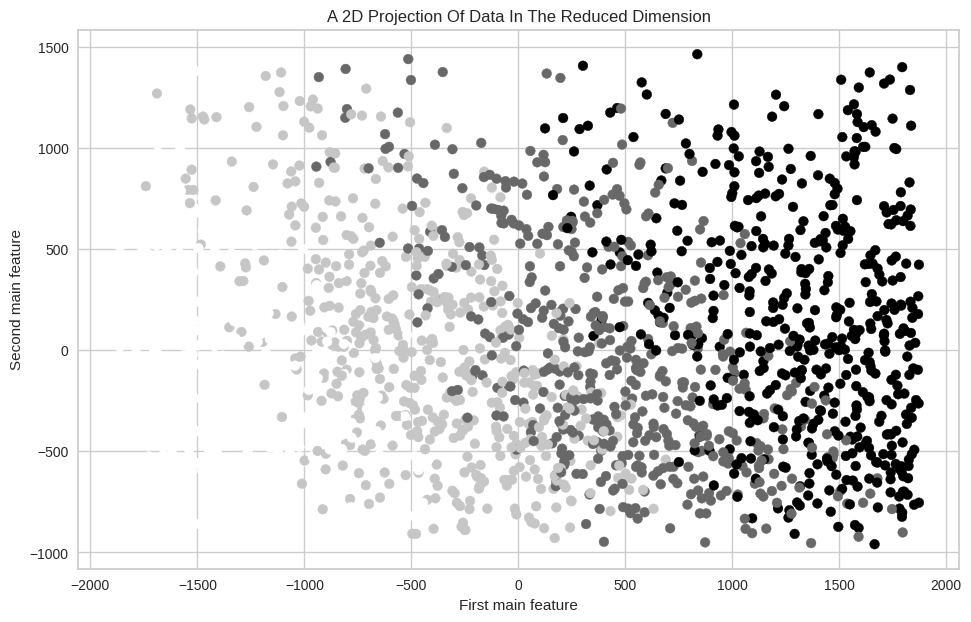

In [10]:
plot_graphics(x, y)

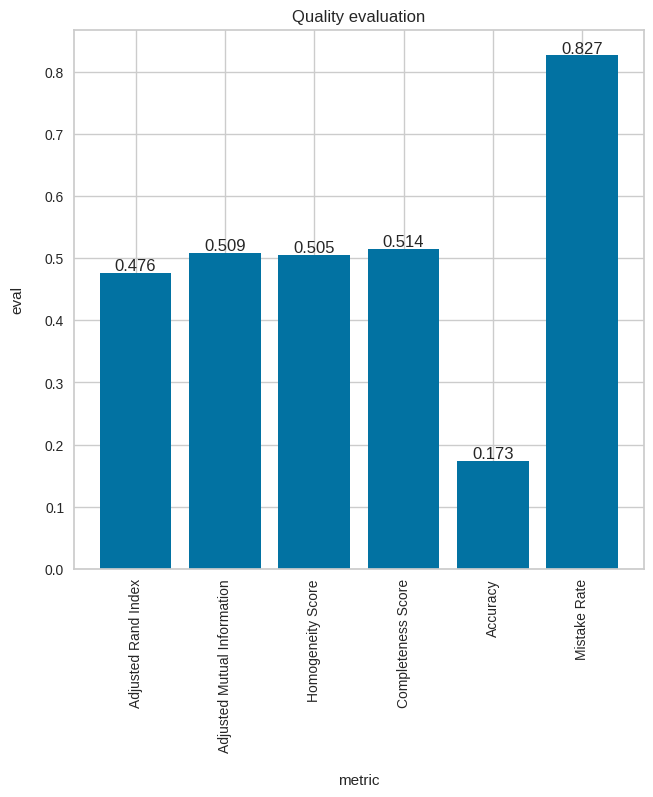

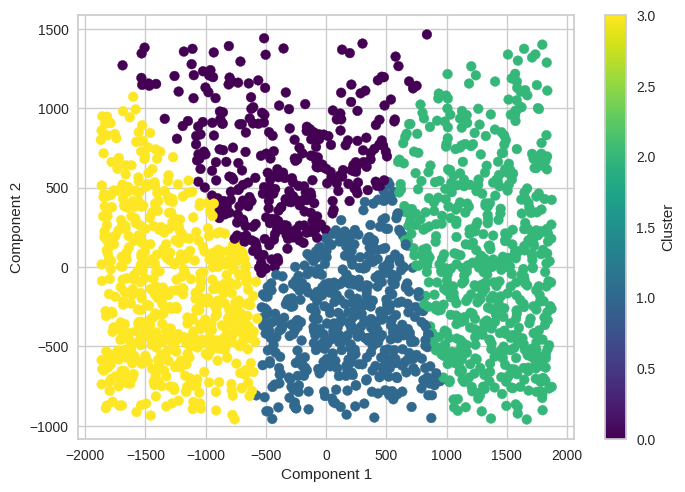

In [11]:
plot_graphics(x, y, y_pred=kmean.labels_)
visualize_clusters(x, clusters=kmean.labels_)

## С правилом локтя

In [12]:
def elbow_rule(x, title="Elbow method"):
    visualizer = KElbowVisualizer(KMeans(random_state=7),
                                  param_grid={"n_clusters": range(1, 600)},
                                  title=title)
    visualizer.fit(x)
    visualizer.show()
    return visualizer.elbow_value_

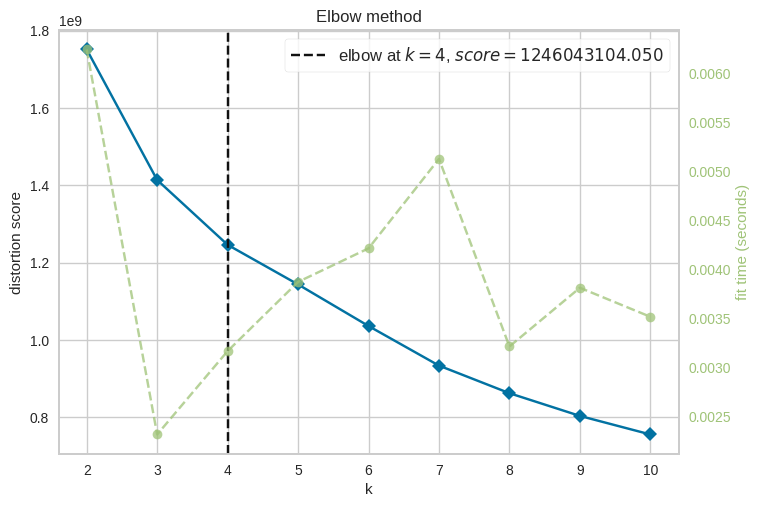

In [13]:
elbow_value = elbow_rule(x)

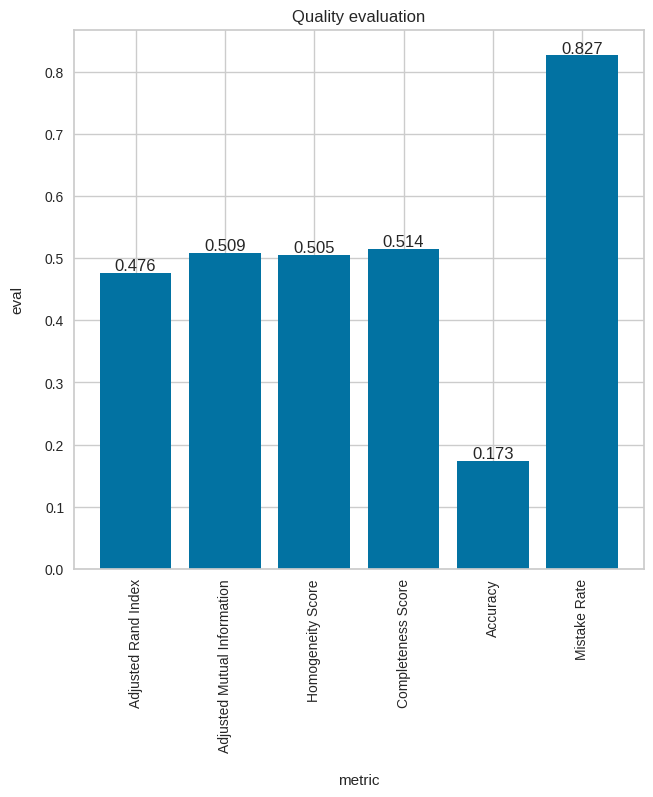

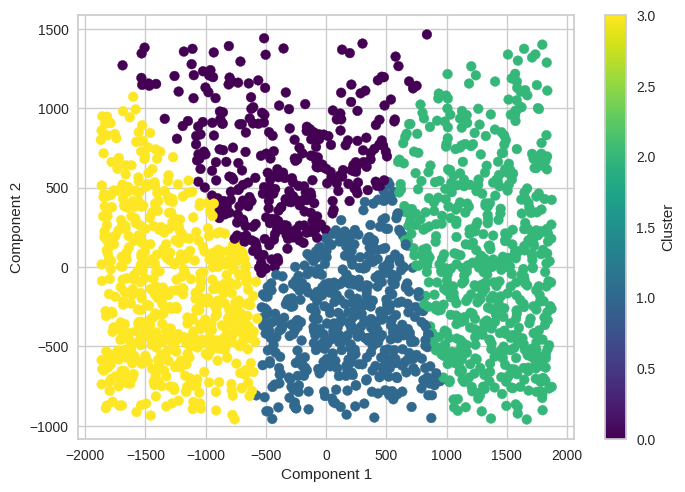

In [14]:
kmean = KMeans(n_clusters=elbow_value, random_state=7).fit(x)
plot_graphics(x, y, kmean.labels_)
visualize_clusters(x, clusters=kmean.labels_)

# Affinity Propagation 

In [15]:
def build_af(x, y, param_grid):
    fitted = []
    for params in ParameterGrid(param_grid):
        af = AffinityPropagation(**params, random_state=7).fit(x)
        fitted.append((af, silhouette_score(x, af.labels_)))

    af = max(fitted, key=lambda model: model[1])[0]
    n_clusters = len(af.cluster_centers_indices_)
    plot_graphics(x, y, af.labels_)
    visualize_clusters(x, clusters=af.labels_)
    print(f"Best model params:\n"
          f"damping={af.damping}\n"
          f"max_iter={af.max_iter}\n"
          f"clusters={n_clusters}")

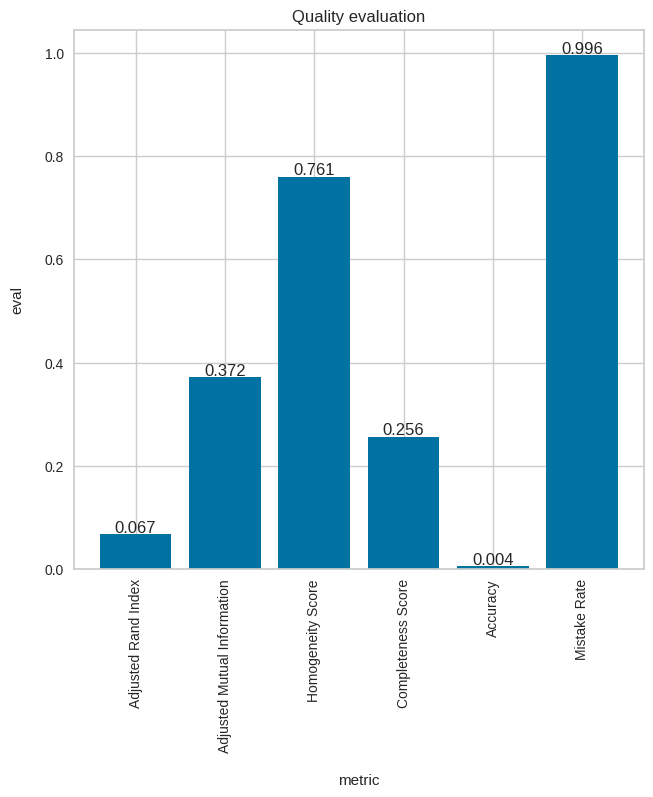

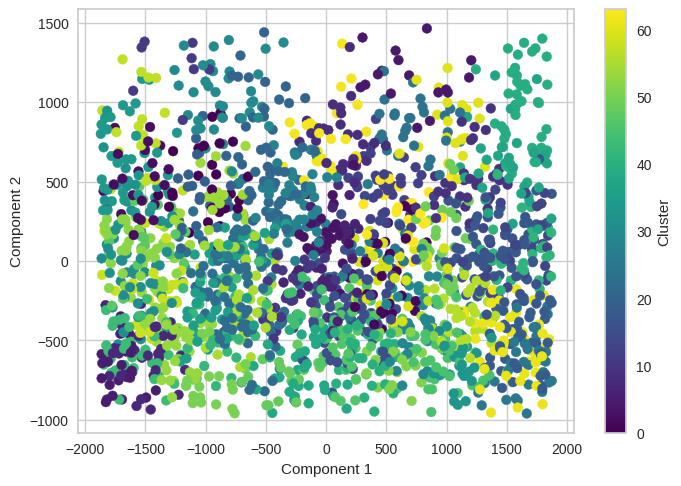

Best model params:
damping=0.7
max_iter=50
clusters=64


In [16]:
param_grid_af = {
        'damping': [0.5, 0.6, 0.7, 0.8, 0.9],
        'max_iter': [50, 100, 200, 500],
    }
build_af(x, y, param_grid_af)

BIRCH

In [17]:
def build_birch(x, y, param_grid):
    fitted = []
    for params in ParameterGrid(param_grid):
        birch = Birch(**params).fit(x)
        if len(np.unique(birch.labels_)) > 1:  
            score = silhouette_score(x, birch.labels_)
            fitted.append((birch, score))

    birch = max(fitted, key=lambda model: model[1])[0]
    n_clusters = len(np.unique(birch.labels_))
    plot_graphics(x, y, birch.labels_)
    visualize_clusters(x, clusters=birch.labels_)
    print(f"Best model params:\n"
          f"n_clusters={birch.n_clusters}\n"
          f"threshold={birch.threshold}\n"
          f"clusters={n_clusters}")

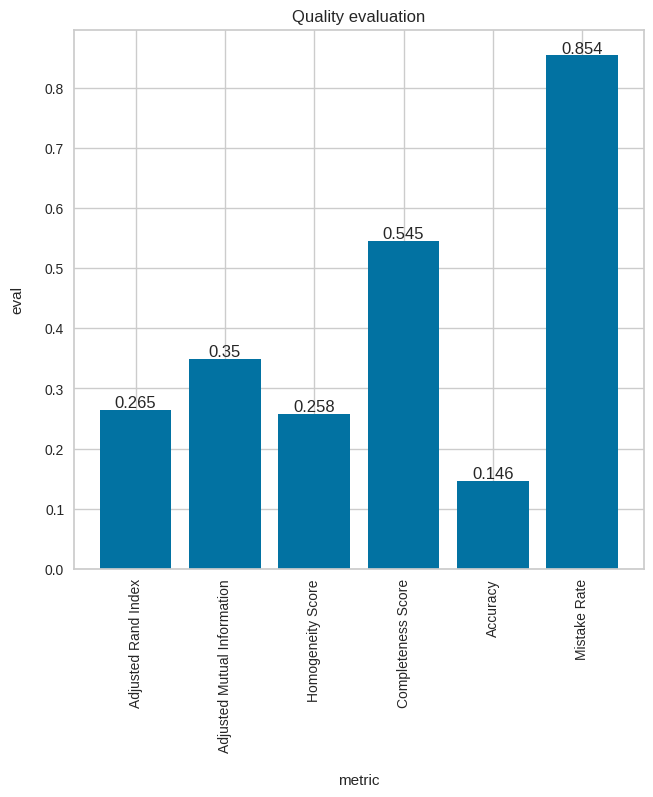

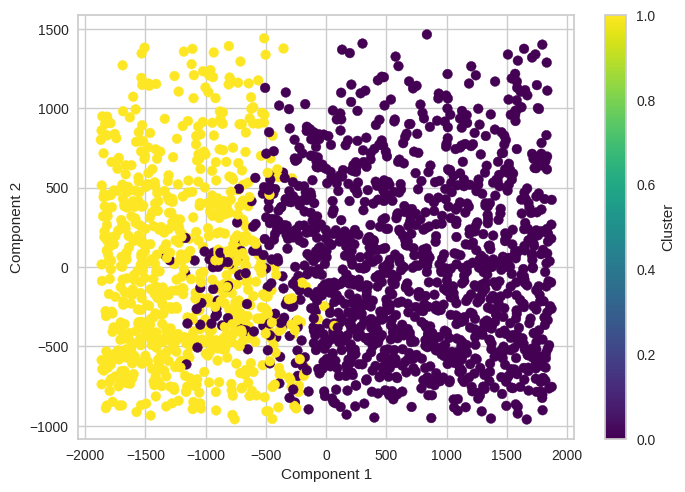

Best model params:
n_clusters=2
threshold=0.1
clusters=2


In [18]:
param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'threshold': [0.1, 0.2, 0.3, 0.4, 0.5]
}

build_birch(x, y, param_grid)

![image.png](https://neerc.ifmo.ru/wiki/images/2/28/Cluster_comparison.png)